<font size=5  color= red> 实训：自行车租赁统计数据分析 </font>

In [4]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,8))
%matplotlib inline

In [5]:
bike = pd.read_csv('data//bike.csv')
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## 查看有无缺失值

In [6]:
bike.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

## #查看待处理数据的数据类型

In [7]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [8]:
bike.datetime = pd.to_datetime(bike.datetime)
bike.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [9]:
bike = bike.set_index('datetime')


## 先从数值型数据入手，可以看出租赁额（count）数值差异大，所以希望观察一下它们的密度分布

sns.distplot(s, bins = 10, hist = True, kde = True,  
          norm_hist = False, rug = True, vertical = False,
            color = ‘g', label = 'distplot', axlabel = 'x')


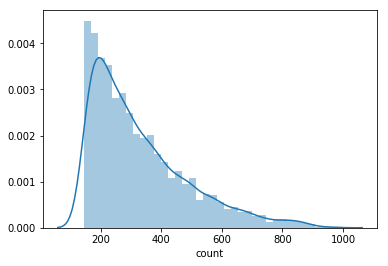

In [33]:
sns.distplot(bike["count"])
# plt.plot(s.index,s.values)#作图


In [11]:

bike["count"].describe()


count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

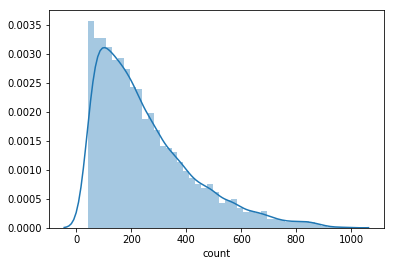

In [12]:
def Count(x):
    if x <42:
        return np.nan
    else:
        return x
bike1 = bike
bike1["count"] = bike1["count"].apply(Count)
bike1 = bike1.dropna(axis=0, how='any')
sns.distplot(bike1["count"])

In [13]:
def Count(x):
    if x <145:
        return np.nan
    else:
        return x
bike2= bike
bike2["count"] = bike2["count"].apply(Count)
bike2 = bike2.dropna(axis=0, how='any')

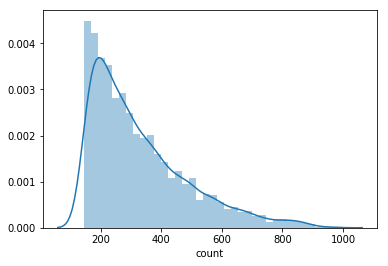

In [14]:
sns.distplot(bike2["count"])
# plt.plot(s.index,s.values)#作图

In [15]:
bike = bike2

In [16]:
bike.shape

(5455, 11)

In [17]:
y_bike = bike.groupby(bike.index.year).mean()['count']
y_bike 

datetime
2011    274.526697
2012    366.408629
Name: count, dtype: float64

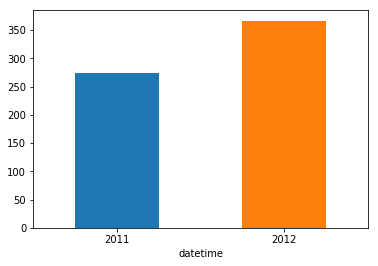

In [18]:
y_bike.plot(kind='bar',rot = 0)


In [19]:
mm_bike = bike.resample('M',kind = "period").mean()
mm_bike.head()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01,1.0,0.000000,1.000000,1.160000,8.692000,10.909600,49.320000,11.880440,5.280000,175.520000,180.800000
2011-02,1.0,0.000000,0.791045,1.283582,14.294925,17.243134,44.179104,18.179100,23.835821,168.208955,192.044776
2011-03,1.0,0.000000,0.666667,1.291667,16.553750,19.728021,49.458333,18.187778,48.583333,163.781250,212.364583
2011-04,2.0,0.078014,0.617021,1.453901,19.970780,23.634752,55.177305,16.893741,60.624113,177.539007,238.163121
2011-05,2.0,0.000000,0.758197,1.446721,23.060820,27.214037,64.069672,13.946627,55.745902,224.110656,279.856557


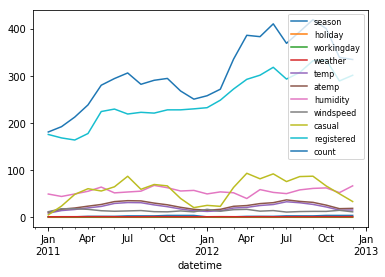

In [20]:
mm_bike.plot()
plt.legend(loc = "best",fontsize = 8)

In [21]:
m_bike = bike.groupby(bike.index.month).mean()['count']
m_bike 

datetime
1     246.528736
2     250.560784
3     301.152738
4     336.355450
5     336.163265
6     355.171329
7     339.714533
8     343.414035
9     363.035849
10    354.840304
11    308.497992
12    300.295045
Name: count, dtype: float64

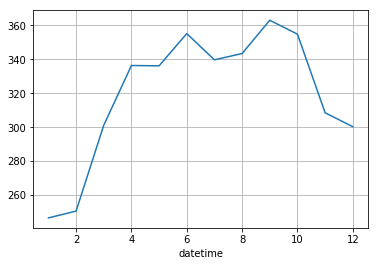

In [22]:
m_bike.plot()
plt.grid()# 9月份达到最大值

In [23]:
h_bike = bike.groupby(bike.index.hour).mean()['count']
h_bike 

datetime
0     175.040000
1     159.666667
6     170.777778
7     332.275194
8     464.194611
9     256.773109
10    247.983051
11    273.677966
12    300.908587
13    306.273504
14    294.686217
15    302.322946
16    358.840314
17    493.831382
18    462.374101
19    361.031746
20    280.290419
21    227.334507
22    197.688776
23    180.289855
Name: count, dtype: float64

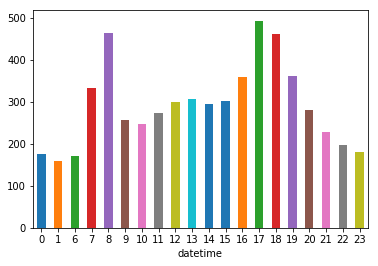

In [24]:
h_bike.plot("bar",rot = 0)

In [25]:
season_bike = bike.groupby(bike.season).mean()['count']
season_bike 

season
1    272.279639
2    343.308545
3    348.337306
4    322.621935
Name: count, dtype: float64

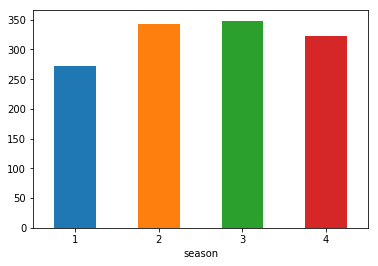

In [26]:
season_bike.plot(kind = "bar",rot = 0)

In [34]:
temp_bike = bike.groupby([bike.temp]).mean()['count']
temp_bike.sample(10)

temp
27.06    346.248826
34.44    351.315789
36.90    347.000000
16.40    299.202128
4.92     220.857143
24.60    350.036885
11.48    256.326923
22.96    336.873303
1.64     180.000000
26.24    365.153257
Name: count, dtype: float64

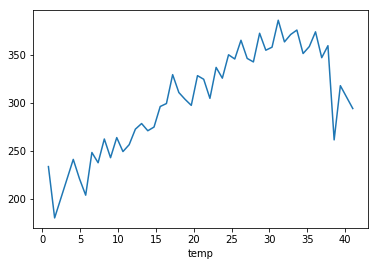

In [28]:
temp_bike.plot()

In [29]:
wind_bike = bike.groupby(bike.windspeed).mean()['count']


In [36]:
wind_bike.sort_values(ascending=False).sample(10)

windspeed
43.9989    389.333333
40.9973    229.375000
32.9975    293.097561
39.0007    335.636364
26.0027    356.098485
47.9988    280.000000
22.0028    319.870056
11.0014    336.831826
7.0015     325.181614
15.0013    340.349904
Name: count, dtype: float64

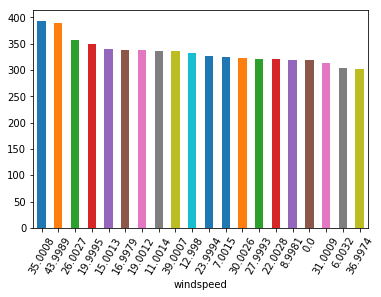

In [31]:
wind_bike_sort = wind_bike.sort_values(ascending=False)
wind_bike_sort.head(20).plot(kind="bar",rot = 60)

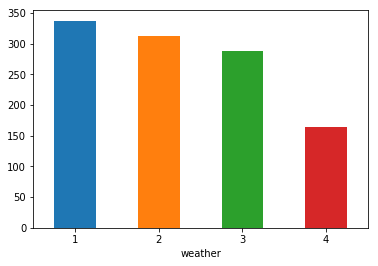

In [32]:
weather_bike = bike.groupby(bike.weather).mean()['count']
weather_bike.plot(kind='bar',rot = 0)